# **STOCK MARKET ANALYSIS WITH PROPHET** by Augustine Ojo

### Importinng Dependencies and Libraries

In [ ]:
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet
#from prophet.plot import plot_

### PreProphet Data Exploration and Analysis

In [ ]:
stocks_df = pd.read_csv('/content/stcks_df.csv', parse_dates=['Date'], index_col='Date')
stocks_df.head(3)

,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,GOOGL,GS,HD,IBM,INTC,JNJ,KO,META,MSFT,NVDA,QQQ,SPY,XOM
Date,,,,,,,,,,,,,,,,,,,,
2012-05-18 00:00:00+00:00,15.996172,10.6925,46.533325,57.249630,63.887566,11.279345,59.677826,14.987913,75.709747,35.358429,116.428940,18.292822,44.516636,25.100883,38.115242,23.443844,0.276979,54.290005,103.318832,49.654617
2012-05-21 00:00:00+00:00,16.928110,10.9055,47.314480,59.427006,66.264969,11.416314,60.423359,15.330158,76.518456,35.779289,117.546387,18.348953,44.600960,25.256802,33.927845,23.828302,0.281794,55.807716,105.094696,50.002022
2012-05-22 00:00:00+00:00,16.798122,10.7665,47.331264,59.178638,65.911972,11.457406,60.199085,14.997898,77.327133,36.267761,116.987648,18.264761,44.636089,25.148336,30.906942,23.836313,0.278355,55.745228,105.277847,49.947166


In [ ]:
volume_df = pd.read_csv('/content/new_volume.csv', parse_dates=['Date'], index_col='Date').dropna()
volume_df.head(3)

,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,GOOGL,GS,HD,IBM,INTC,JNJ,KO,META,MSFT,NVDA,QQQ,SPY,XOM
Date,,,,,,,,,,,,,,,,,,,,
2012-05-18 00:00:00+00:00,732292400.0,104634000.0,8783700.0,5597400,8655900,57520600.0,11137700,238701060.0,7184700.0,12962200.0,6001007,43444900.0,13781300,31913000,573576400.0,56205300.0,567288000.0,79496500.0,319615900.0,21747200
2012-05-21 00:00:00+00:00,631106000.0,71596000.0,4568600.0,4709700,6811300,37628500.0,6169400,122892984.0,5314700.0,12713000.0,4007958,41389400.0,8784900,13488800,168192700.0,38787900.0,416260000.0,61473000.0,177861100.0,13730400
2012-05-22 00:00:00+00:00,694870400.0,74662000.0,5858600.0,4269400,7210500,42979200.0,6089700,121953924.0,5839700.0,15028300.0,3731187,46037700.0,8409300,15260600,101786600.0,39504900.0,410140000.0,62954800.0,197531200.0,13790000


In [ ]:
#volume_df.info()
volume_df = volume_df.astype(float)
volume_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3112 entries, 2012-05-18 00:00:00+00:00 to 2024-10-01 00:00:00+00:00
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3112 non-null   float64
 1   AMZN    3112 non-null   float64
 2   AXP     3112 non-null   float64
 3   BA      3112 non-null   float64
 4   CAT     3112 non-null   float64
 5   CSCO    3112 non-null   float64
 6   CVX     3112 non-null   float64
 7   GOOGL   3112 non-null   float64
 8   GS      3112 non-null   float64
 9   HD      3112 non-null   float64
 10  IBM     3112 non-null   float64
 11  INTC    3112 non-null   float64
 12  JNJ     3112 non-null   float64
 13  KO      3112 non-null   float64
 14  META    3112 non-null   float64
 15  MSFT    3112 non-null   float64
 16  NVDA    3112 non-null   float64
 17  QQQ     3112 non-null   float64
 18  SPY     3112 non-null   float64
 19  XOM     3112 non-null   float64
dtypes: float64(20)
memory usag

In [ ]:
#stocks_df.info()
# Convert all columns to float
stocks_df = stocks_df.astype(float)
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3112 entries, 2012-05-18 00:00:00+00:00 to 2024-10-01 00:00:00+00:00
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3112 non-null   float64
 1   AMZN    3112 non-null   float64
 2   AXP     3112 non-null   float64
 3   BA      3112 non-null   float64
 4   CAT     3112 non-null   float64
 5   CSCO    3112 non-null   float64
 6   CVX     3112 non-null   float64
 7   GOOGL   3112 non-null   float64
 8   GS      3112 non-null   float64
 9   HD      3112 non-null   float64
 10  IBM     3112 non-null   float64
 11  INTC    3112 non-null   float64
 12  JNJ     3112 non-null   float64
 13  KO      3112 non-null   float64
 14  META    3112 non-null   float64
 15  MSFT    3112 non-null   float64
 16  NVDA    3112 non-null   float64
 17  QQQ     3112 non-null   float64
 18  SPY     3112 non-null   float64
 19  XOM     3112 non-null   float64
dtypes: float64(20)
memory usag

 # **PART A:** SINGLE STOCK (NVDA) DATA ANALYSIS and VISULAIZATION

In [ ]:
stocks_nvda_df= stocks_df["NVDA"]
stocks_nvda_df.head(3)

,NVDA
Date,
2012-05-18 00:00:00+00:00,0.276979
2012-05-21 00:00:00+00:00,0.281794
2012-05-22 00:00:00+00:00,0.278355


In [ ]:
stocks_nvda_df = stocks_df[["NVDA"]].rename(columns={"NVDA": "Close"})
stocks_nvda_df.head(3)

,Close
Date,
2012-05-18 00:00:00+00:00,0.276979
2012-05-21 00:00:00+00:00,0.281794
2012-05-22 00:00:00+00:00,0.278355


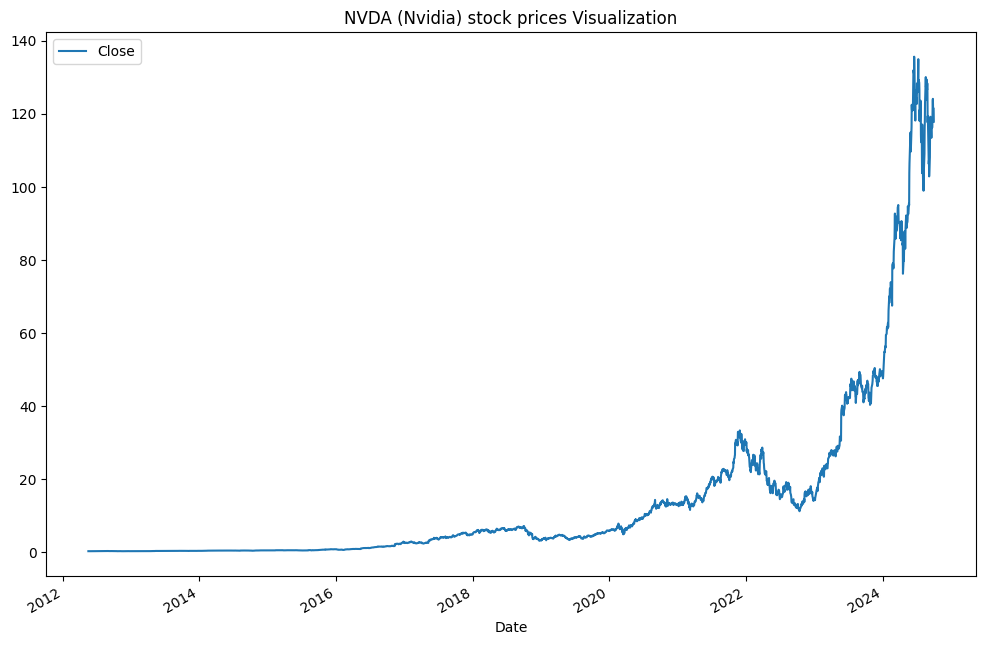

In [ ]:
stocks_nvda_df.plot(figsize=(12, 8), title="NVDA (Nvidia) stock prices Visualization");

In [ ]:
#### rolling window == Creating Moving Average for NVDA
nvda_sma_df = stocks_nvda_df.copy()# rolling(window = 21).mean()
#nvda_sma_df

In [ ]:
## Creating the 50 Days Moving Average for NVDA
nvda_sma_df["SMA50"] = nvda_sma_df.rolling(window = 50, min_periods=50).mean()
#nvda_sma_df

In [ ]:
## Creating the 200 Days Moving Average for NVDA
nvda_sma_df["SMA200"] = nvda_sma_df.Close.rolling(window = 200).mean()
#nvda_sma_df

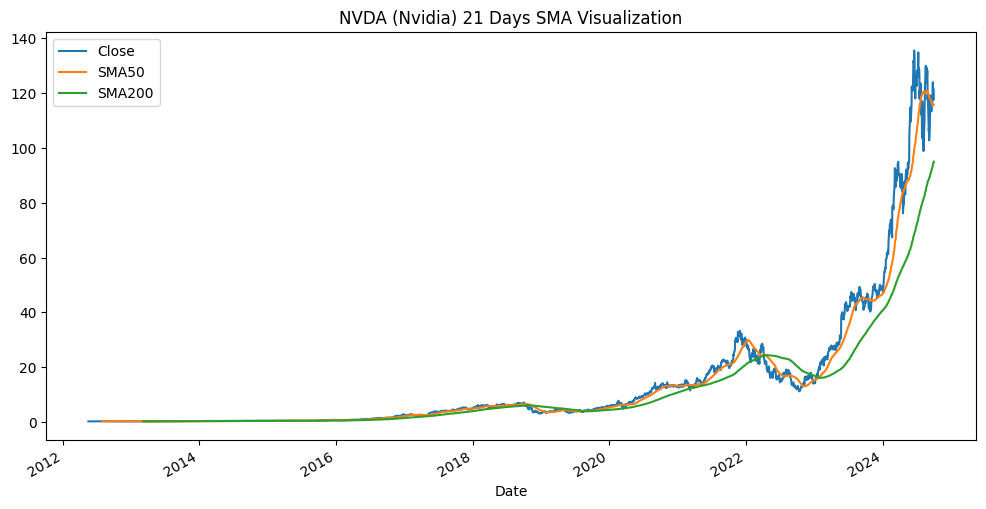

In [ ]:
nvda_sma_df.plot(figsize=(12, 6), title="NVDA (Nvidia) 21 Days SMA Visualization");

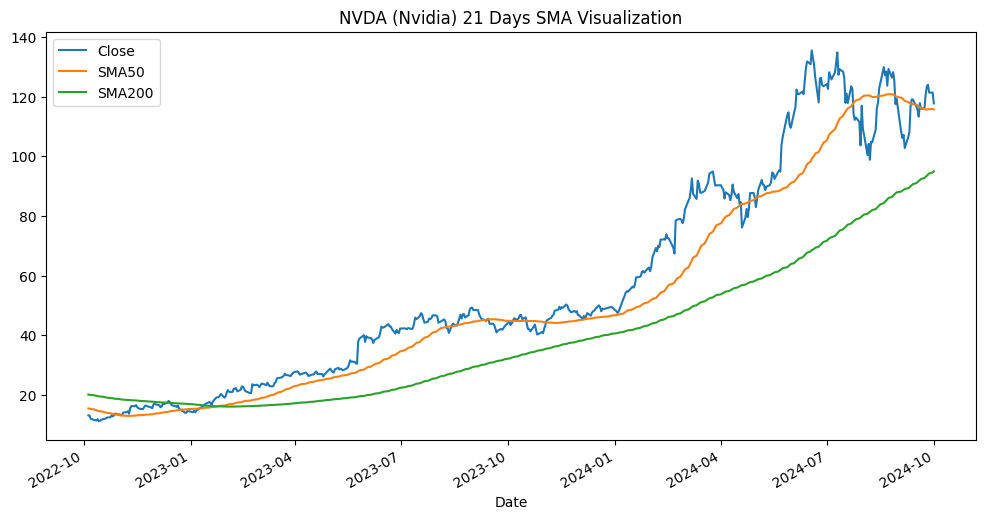

In [ ]:
# Plotting the last 500 days/Rows of the dataset
nvda_sma_df.iloc[-500:,:].plot(figsize=(12, 6), title="NVDA (Nvidia) 21 Days SMA Visualization");

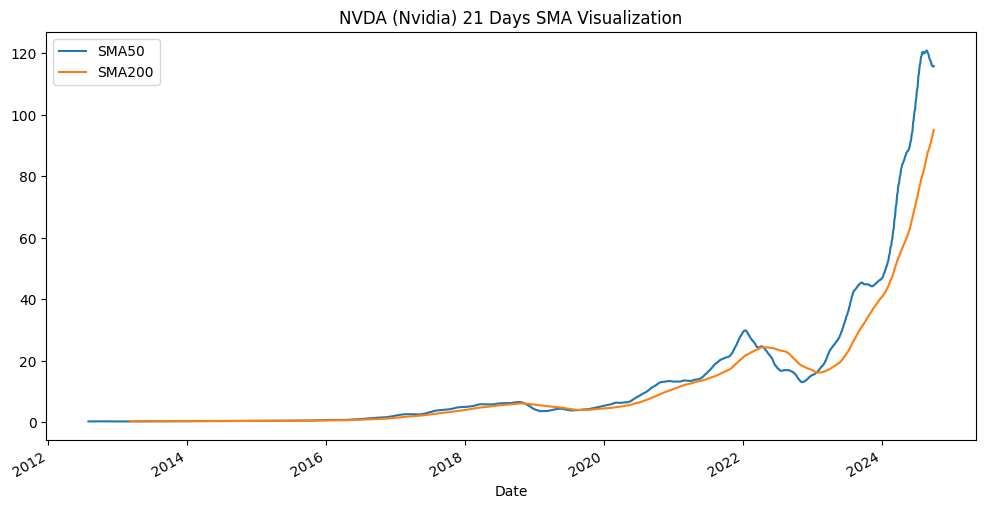

In [ ]:
# Pltotting only the SMAs without the noisy daily dataset >> ALL ROWS but last two columns
nvda_sma_df.iloc[:,-2:].plot(figsize=(12, 6), title="NVDA (Nvidia) 21 Days SMA Visualization");

 ### CALCULATING RISKS AND RETURNS BASED ON MONTHLY DATA AGGREGATION

In [ ]:
nvda_mth_df = stocks_nvda_df.copy()# rolling(window = 21).mean()
nvda_mth_df.head(3)

,Close
Date,
2012-05-18 00:00:00+00:00,0.276979
2012-05-21 00:00:00+00:00,0.281794
2012-05-22 00:00:00+00:00,0.278355


In [ ]:
## Calculating Monthly Returns
nvda_mth_df.resample("ME").last().head(3)

,Close
Date,
2012-05-31 00:00:00+00:00,0.285004
2012-06-30 00:00:00+00:00,0.316875
2012-07-31 00:00:00+00:00,0.310455


In [ ]:
nvda_mth_retn_df = nvda_mth_df.resample("ME").last().pct_change(1).dropna()
nvda_mth_retn_df = nvda_mth_retn_df.rename(columns={"Close": "Return"})
display(nvda_mth_retn_df.head(3))
display(nvda_mth_retn_df.tail(3))

,Return
Date,
2012-06-30 00:00:00+00:00,0.111826
2012-07-31 00:00:00+00:00,-0.020260
2012-08-31 00:00:00+00:00,0.036189


,Return
Date,
2024-08-31 00:00:00+00:00,0.020082
2024-09-30 00:00:00+00:00,0.017428
2024-10-31 00:00:00+00:00,-0.030055


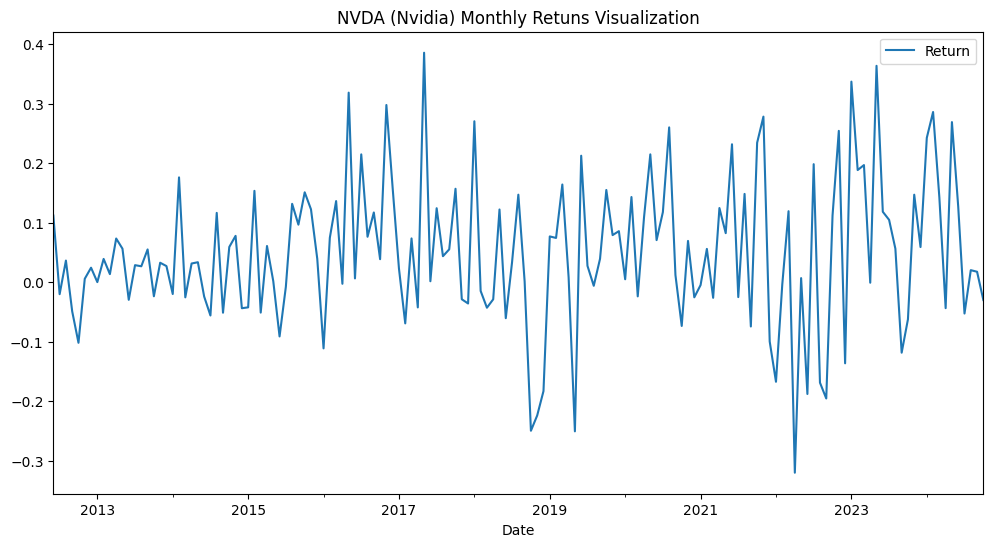

In [ ]:
# NVDA Monthly Returns Chart
nvda_mth_retn_df.plot(figsize=(12, 6), title="NVDA (Nvidia) Monthly Retuns Visualization");
#nvda_mth_retn_df.iloc[-500:,:].plot(figsize=(12, 6), title="NVDA (Nvidia) Monthly Retuns Visualization");

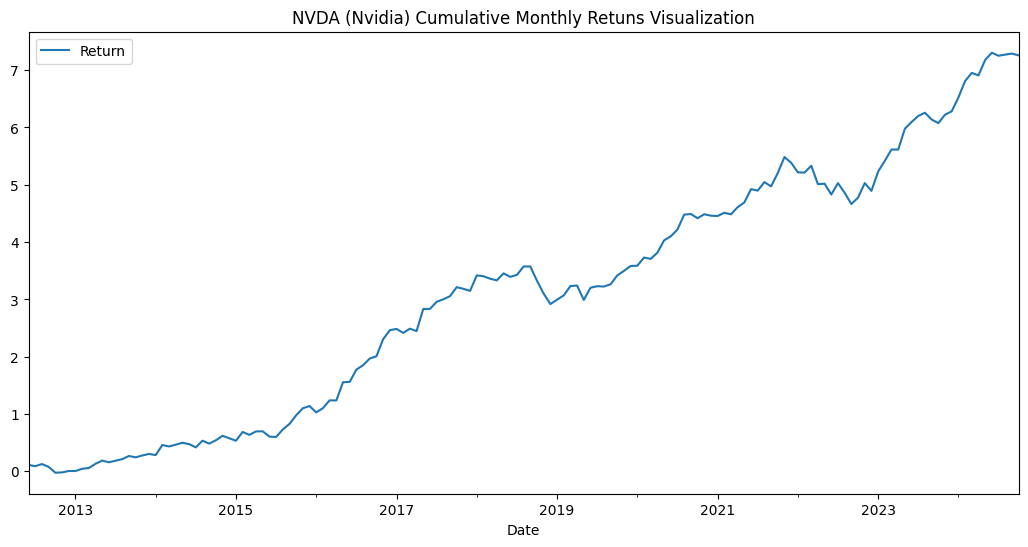

In [ ]:
#Cumulative Monthly returns of Invidia
nvda_mth_retn_df.cumsum().plot(figsize=(12, 6), title="NVDA (Nvidia) Cumulative Monthly Retuns Visualization");
plt.subplots_adjust(right=0.95)
#
#display(nvda_mth_retn_df.cumsum())

In [ ]:
#### rolling window == Creating Moving Average for NVDA
nvda_return_sma_df = nvda_mth_retn_df.cumsum().copy()# rolling(window = 21).mean()
nvda_return_sma_df["sma21"] = nvda_return_sma_df.rolling(window = 21, min_periods=10).mean()

In [ ]:
nvda_return_sma_df.head(3)

,Return,sma21
Date,,
2012-06-30 00:00:00+00:00,0.111826,NaN
2012-07-31 00:00:00+00:00,0.091566,NaN
2012-08-31 00:00:00+00:00,0.127755,NaN


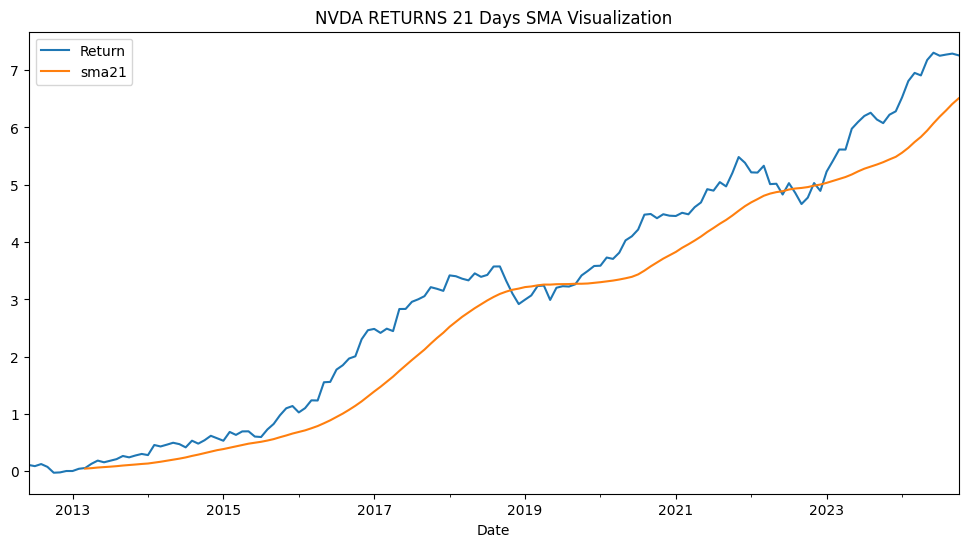

In [ ]:
nvda_return_sma_df.plot(figsize=(12, 6), title="NVDA RETURNS 21 Days SMA Visualization");

##

# **PART B:** PREDICTING STOCK MARKET WITH PROPHET MODELLING

In [ ]:
prophet_df = stocks_nvda_df.reset_index()#
prophet_df.head()

,Date,Close
0,2012-05-18 00:00:00+00:00,0.276979
1,2012-05-21 00:00:00+00:00,0.281794
2,2012-05-22 00:00:00+00:00,0.278355
3,2012-05-23 00:00:00+00:00,0.285233
4,2012-05-24 00:00:00+00:00,0.277667


In [ ]:
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df.head()

,ds,y
0,2012-05-18 00:00:00+00:00,0.276979
1,2012-05-21 00:00:00+00:00,0.281794
2,2012-05-22 00:00:00+00:00,0.278355
3,2012-05-23 00:00:00+00:00,0.285233
4,2012-05-24 00:00:00+00:00,0.277667


In [ ]:
prophet_df = prophet_df.dropna()
prophet_df.head()

,ds,y
0,2012-05-18 00:00:00+00:00,0.276979
1,2012-05-21 00:00:00+00:00,0.281794
2,2012-05-22 00:00:00+00:00,0.278355
3,2012-05-23 00:00:00+00:00,0.285233
4,2012-05-24 00:00:00+00:00,0.277667


In [ ]:
m = Prophet()
m

In [ ]:
# Remove timezone from the 'ds' column
prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)

# Now you can fit the model
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2sd_dh6f/ylf_cjua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2sd_dh6f/fdh4twr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97237', 'data', 'file=/tmp/tmp2sd_dh6f/ylf_cjua.json', 'init=/tmp/tmp2sd_dh6f/fdh4twr1.json', 'output', 'file=/tmp/tmp2sd_dh6f/prophet_modelsstrbn6s/prophet_model-20241015174705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365, freq='D')
display(future.head())
display(future.tail())

,ds
0,2012-05-18
1,2012-05-21
2,2012-05-22
3,2012-05-23
4,2012-05-24


,ds
3472,2025-09-27
3473,2025-09-28
3474,2025-09-29
3475,2025-09-30
3476,2025-10-01


In [ ]:
forecast = m.predict(future)
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,-0.135696,-8.953710,10.152225,-0.135696,-0.135696,0.043898,0.043898,0.043898,-0.105119,-0.105119,-0.105119,0.149017,0.149017,0.149017,0.0,0.0,0.0,-0.091798
1,2012-05-21,-0.133154,-8.452702,9.441022,-0.133154,-0.133154,0.525848,0.525848,0.525848,0.028505,0.028505,0.028505,0.497342,0.497342,0.497342,0.0,0.0,0.0,0.392694
2,2012-05-22,-0.132306,-9.264845,10.447043,-0.132306,-0.132306,0.577961,0.577961,0.577961,-0.055817,-0.055817,-0.055817,0.633778,0.633778,0.633778,0.0,0.0,0.0,0.445655
3,2012-05-23,-0.131459,-8.757624,10.110268,-0.131459,-0.131459,0.609141,0.609141,0.609141,-0.169555,-0.169555,-0.169555,0.778696,0.778696,0.778696,0.0,0.0,0.0,0.477682
4,2012-05-24,-0.130612,-8.387190,10.297635,-0.130612,-0.130612,0.815932,0.815932,0.815932,-0.114803,-0.114803,-0.114803,0.930735,0.930735,0.930735,0.0,0.0,0.0,0.685320


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3472,2025-09-27,139.602261,126.469644,152.083710,131.928210,147.578647,-0.274524,-0.274524,-0.274524,0.208394,0.208394,0.208394,-0.482918,-0.482918,-0.482918,0.0,0.0,0.0,139.327737
3473,2025-09-28,139.710557,126.824001,152.369135,131.992294,147.750305,-0.326433,-0.326433,-0.326433,0.208394,0.208394,0.208394,-0.534827,-0.534827,-0.534827,0.0,0.0,0.0,139.384123
3474,2025-09-29,139.818852,126.848672,151.487860,132.056378,147.949679,-0.568319,-0.568319,-0.568319,0.028505,0.028505,0.028505,-0.596825,-0.596825,-0.596825,0.0,0.0,0.0,139.250533
3475,2025-09-30,139.927148,126.892810,151.691503,132.120462,148.102876,-0.725034,-0.725034,-0.725034,-0.055817,-0.055817,-0.055817,-0.669217,-0.669217,-0.669217,0.0,0.0,0.0,139.202113
3476,2025-10-01,140.035443,126.067841,152.523630,132.186670,148.250701,-0.921557,-0.921557,-0.921557,-0.169555,-0.169555,-0.169555,-0.752002,-0.752002,-0.752002,0.0,0.0,0.0,139.113887


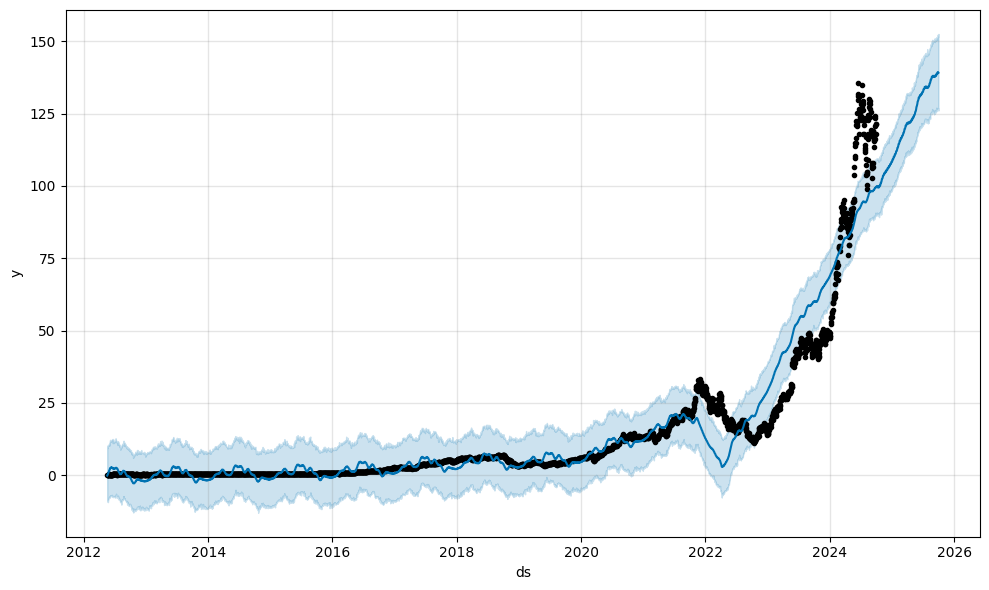

In [ ]:
m.plot(forecast);


In [ ]:
len(forecast)

3477

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-05-18,-0.091798,-8.953710,10.152225
1,2012-05-21,0.392694,-8.452702,9.441022
2,2012-05-22,0.445655,-9.264845,10.447043
3,2012-05-23,0.477682,-8.757624,10.110268
4,2012-05-24,0.685320,-8.387190,10.297635


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3472,2025-09-27,139.327737,126.469644,152.083710
3473,2025-09-28,139.384123,126.824001,152.369135
3474,2025-09-29,139.250533,126.848672,151.487860
3475,2025-09-30,139.202113,126.892810,151.691503
3476,2025-10-01,139.113887,126.067841,152.523630


## Plot UPper and Lower Bounds

In [ ]:
forecast = forecast.set_index('ds')
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2012-05-18,-0.135696,-8.953710,10.152225,-0.135696,-0.135696,0.043898,0.043898,0.043898,-0.105119,-0.105119,-0.105119,0.149017,0.149017,0.149017,0.0,0.0,0.0,-0.091798
2012-05-21,-0.133154,-8.452702,9.441022,-0.133154,-0.133154,0.525848,0.525848,0.525848,0.028505,0.028505,0.028505,0.497342,0.497342,0.497342,0.0,0.0,0.0,0.392694
2012-05-22,-0.132306,-9.264845,10.447043,-0.132306,-0.132306,0.577961,0.577961,0.577961,-0.055817,-0.055817,-0.055817,0.633778,0.633778,0.633778,0.0,0.0,0.0,0.445655
2012-05-23,-0.131459,-8.757624,10.110268,-0.131459,-0.131459,0.609141,0.609141,0.609141,-0.169555,-0.169555,-0.169555,0.778696,0.778696,0.778696,0.0,0.0,0.0,0.477682
2012-05-24,-0.130612,-8.387190,10.297635,-0.130612,-0.130612,0.815932,0.815932,0.815932,-0.114803,-0.114803,-0.114803,0.930735,0.930735,0.930735,0.0,0.0,0.0,0.685320


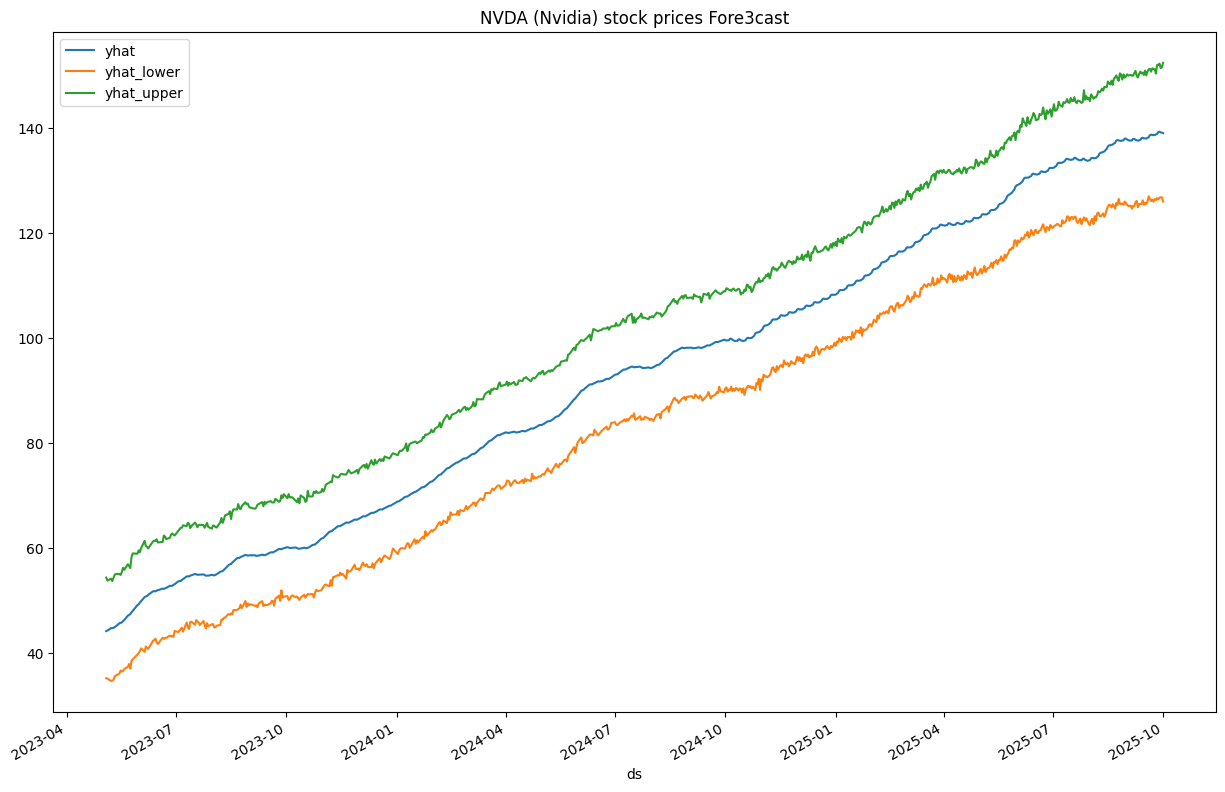

In [ ]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot(
figsize=(15, 10), title="NVDA (Nvidia) stock prices Fore3cast");

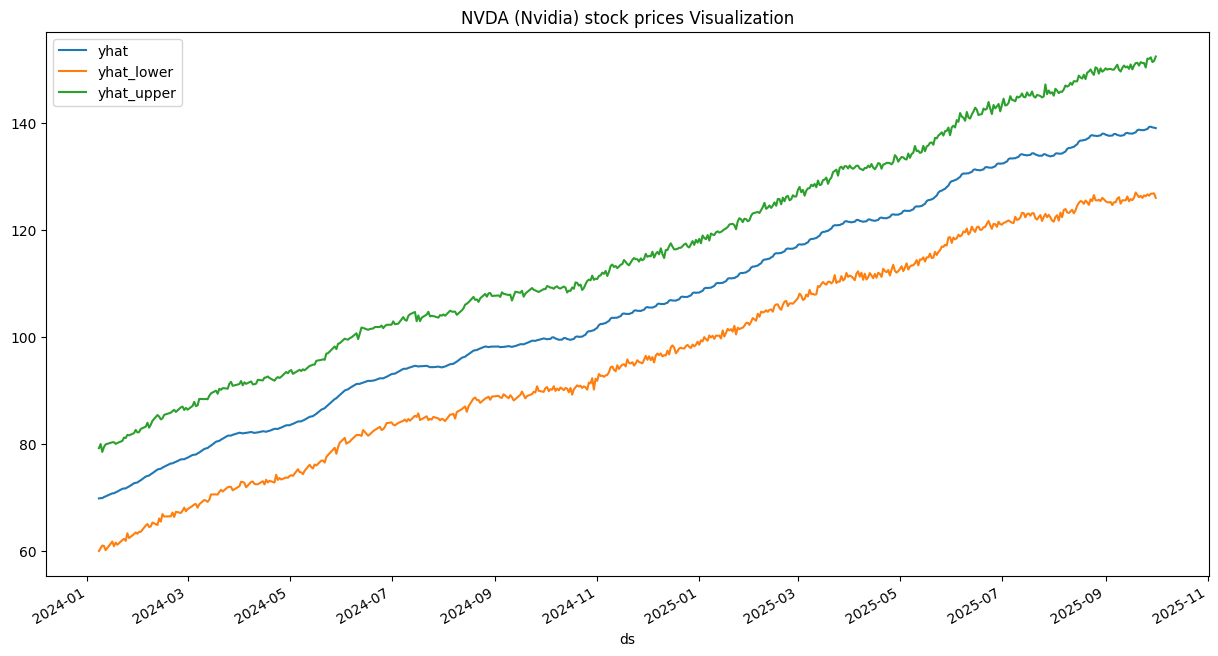

In [ ]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-550:,:].plot(
figsize=(15, 8), title="NVDA (Nvidia) stock prices Visualization");

In [ ]:
forecast = forecast.reset_index()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,-0.135696,-8.953710,10.152225,-0.135696,-0.135696,0.043898,0.043898,0.043898,-0.105119,-0.105119,-0.105119,0.149017,0.149017,0.149017,0.0,0.0,0.0,-0.091798
1,2012-05-21,-0.133154,-8.452702,9.441022,-0.133154,-0.133154,0.525848,0.525848,0.525848,0.028505,0.028505,0.028505,0.497342,0.497342,0.497342,0.0,0.0,0.0,0.392694
2,2012-05-22,-0.132306,-9.264845,10.447043,-0.132306,-0.132306,0.577961,0.577961,0.577961,-0.055817,-0.055817,-0.055817,0.633778,0.633778,0.633778,0.0,0.0,0.0,0.445655
3,2012-05-23,-0.131459,-8.757624,10.110268,-0.131459,-0.131459,0.609141,0.609141,0.609141,-0.169555,-0.169555,-0.169555,0.778696,0.778696,0.778696,0.0,0.0,0.0,0.477682
4,2012-05-24,-0.130612,-8.387190,10.297635,-0.130612,-0.130612,0.815932,0.815932,0.815932,-0.114803,-0.114803,-0.114803,0.930735,0.930735,0.930735,0.0,0.0,0.0,0.685320


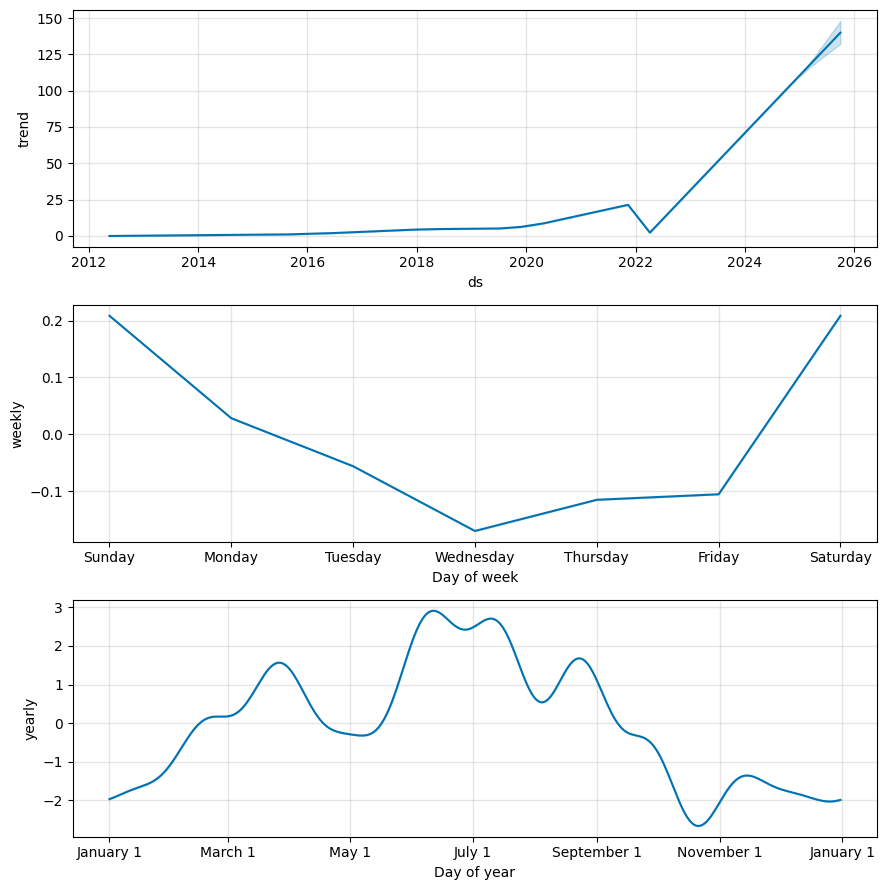

In [ ]:
fig2 = m.plot_components(forecast)